In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

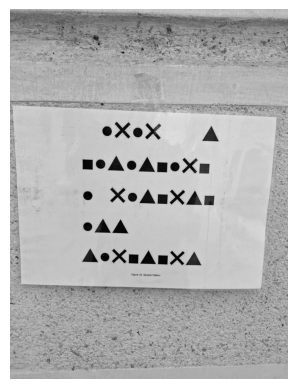

In [18]:
img=cv2.imread("7.jpg")
rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(rgb_img,cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap="gray")
plt.axis('off')
plt.show()

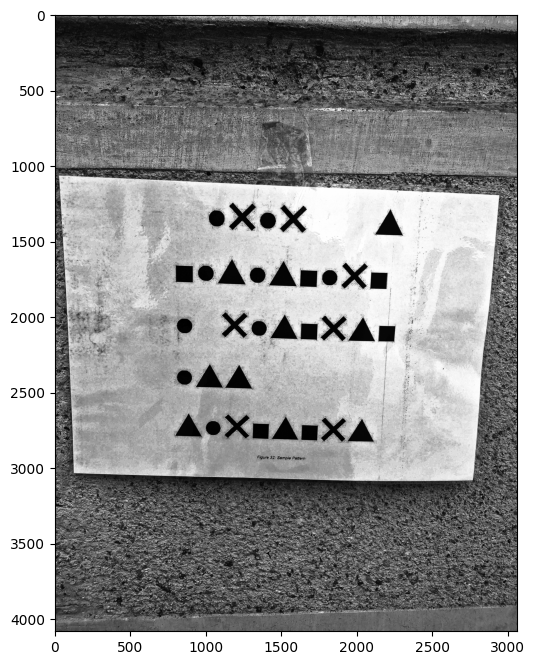

In [9]:
img_eq = cv2.equalizeHist((gray_img).astype(np.uint8))
plt.figure(figsize=(12,8))
plt.imshow(img_eq, cmap = "gray")

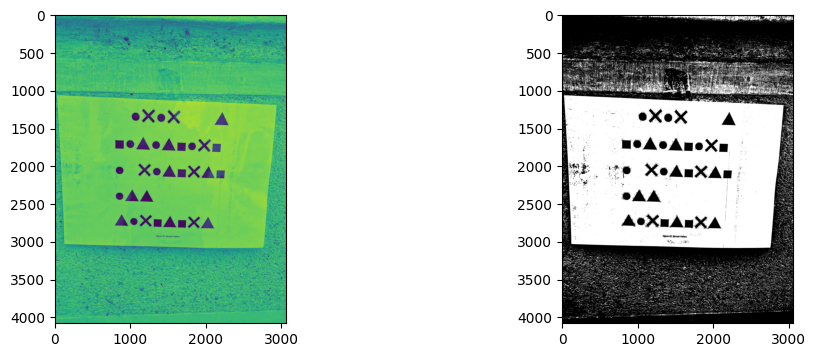

In [10]:
lower_white=170
upper_white=255

mask =cv2.inRange(gray_img, lower_white, upper_white)
result = cv2.bitwise_and(gray_img, gray_img, mask=mask)
fig , axarr=plt.subplots(1,2, figsize=(12,4))

axarr[0].imshow(gray_img)
axarr[1].imshow(mask, cmap='gray')

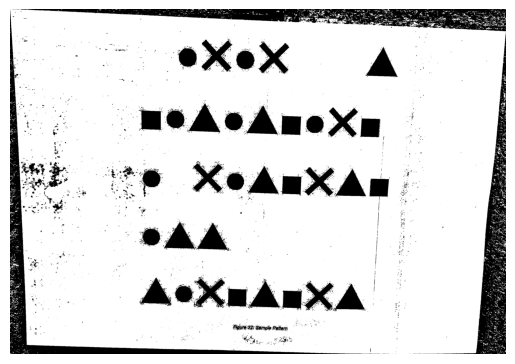

In [20]:

_, thresh_image = cv2.threshold(mask, 220, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

output = mask.copy()
paper_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(paper_contour)

cropped = output[y:y+h, x:x+w]

plt.imshow(cropped, cmap="gray")
plt.axis('off')
plt.show()

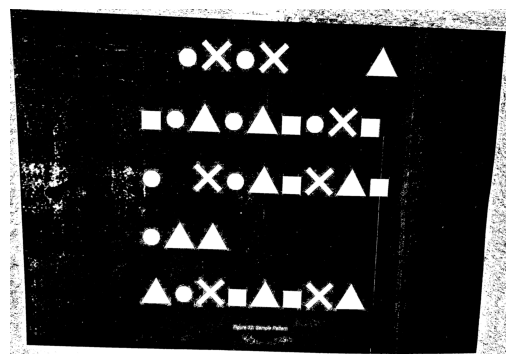

In [21]:
mask_inv = cv2.bitwise_not(cropped)


plt.imshow(mask_inv, cmap="gray")
plt.axis('off')
plt.show()

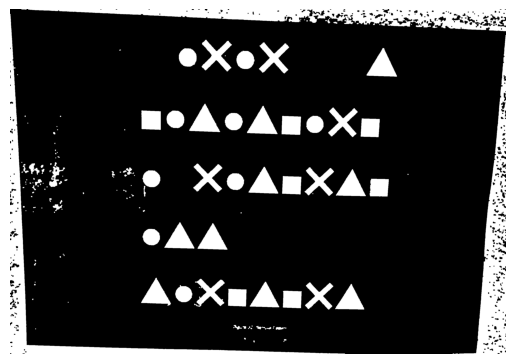

In [22]:
_, mask_inv = cv2.threshold(mask_inv, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
mask_clean = cv2.morphologyEx(mask_inv, cv2.MORPH_OPEN, kernel, iterations=2)
mask_clean = cv2.morphologyEx(mask_clean, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.imshow(mask_clean, cmap="gray")
plt.axis('off')
plt.show()

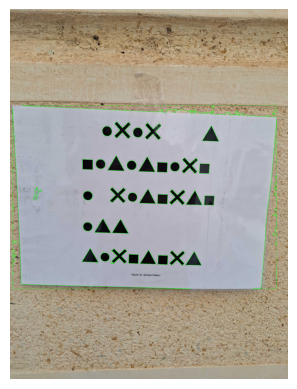

In [23]:
_, thresh_image = cv2.threshold(mask_clean, 220, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


output = rgb_img.copy()
cropped = output[y:y+h, x:x+w]

for contour in contours:
    epsilon = 0.01*cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)


    if cv2.contourArea(contour) < 2000:
      continue
    cv2.drawContours(cropped, [contour], -1, (0, 255, 0), 2)





plt.imshow(output, cmap="gray")
plt.axis('off')
plt.show()
